# Halpha Catalog Paper

* made a copy of Halpha-catalog-paper because that used v1 tables
* this notebook will use the v2 tables

In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import sys
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/havirgo/python/'))
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

Running on Rose's computer


In [4]:
print(homedir)

/home/rfinn


In [5]:
tabledir = os.path.join(homedir,'research/Virgo/tables-north/v2/')
print(tabledir)

/home/rfinn/research/Virgo/tables-north/v2/


In [6]:
plotdir = os.path.join(homedir,'research/Virgo/plots/halpha/')
print(plotdir)

/home/rfinn/research/Virgo/plots/halpha/


### Read in tables

In [89]:
%run ~/github/Virgo/programs/readtablesv2.py

# Sample Statistics

In [11]:
haflag = np.abs(v.halpha['HF_TOT']/v.halpha['HF_TOT_ERR']) > 5

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


(array([332.,  12.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.7400000e-16, 2.3101566e-12, 4.6201389e-12, 6.9301214e-12,
        9.2401043e-12, 1.1550086e-11, 1.3860069e-11, 1.6170051e-11,
        1.8480033e-11, 2.0790017e-11, 2.3099999e-11], dtype=float32),
 <BarContainer object of 10 artists>)

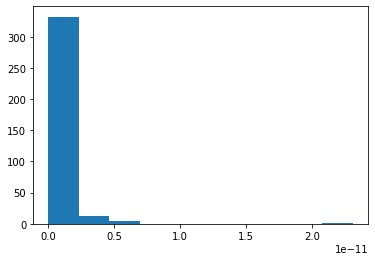

In [13]:
plt.figure()
detect_flag = v.halpha['HF_TOT'] > 0
plt.hist(v.halpha['HF_TOT'][detect_flag])

In [14]:
print(sum(v.halpha['HAobsflag'] & v.env['filament_member']))
print(sum(v.halpha['HAobsflag'] & v.env['filament_member'] & detect_flag))
print(sum(v.halpha['HAobsflag'] & v.env['cluster_member'] ))
print(sum(v.halpha['HAobsflag'] & v.env['cluster_member']  & detect_flag))

425
219
8
1


In [16]:
fields = ['filament_member','poor_group_memb','rich_group_memb','pure_field']

for f in fields:
    print()
    print(f)
    print('number observed: ',sum(v.halpha['HAobsflag'] & v.env[f]))
    print('number detected: ',sum(v.halpha['HAobsflag'] & v.env[f] & detect_flag))


filament_member
number observed:  425
number detected:  219

poor_group_memb
number observed:  134
number detected:  84

rich_group_memb
number observed:  374
number detected:  163

pure_field
number observed:  82
number detected:  41


In [17]:
fil_only = ~v.env['filament_member'] & v.env['rich_group_memb'] & detect_flag
print(np.sum(fil_only))

53


In [18]:
# environments
fil = v.env['filament_member'] & ~v.env['rich_group_memb'] & detect_flag
rg = ~v.env['filament_member'] & v.env['rich_group_memb'] & detect_flag
field = v.env['pure_field']  & detect_flag


In [20]:
fields=[fil,rg,field]
labels = ['field','rich group','pure field']
for i,f in enumerate(fields):
    print()
    print(labels[i])
    print('number observed: ',sum(v.halpha['HAobsflag'] & f))
    print('number detected: ',sum(v.halpha['HAobsflag'] & f & detect_flag))


field
number observed:  109
number detected:  109

rich group
number observed:  53
number detected:  53

pure field
number observed:  41
number detected:  41


# Image Quality 

* plot H - R FWHM vs R FWHM

In [82]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


H FWHM - R FWHM = 0.03 +/- 0.06


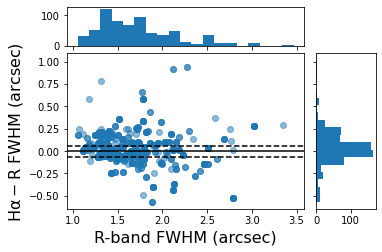

In [83]:
h.plot_fwhm_r_h()

# Compare my R mag and NSA mag

In [91]:
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

In [22]:
v.halpha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,TEL,DATE-OBS,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_M20,ELLIP_HM20,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_LOG_SFR_HA_FLAG,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,LOG_SFR_HA_FLAG,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag,VFID_V1
bytes8,float64,float64,float64,float32,bytes30,bytes36,bool,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes40,bytes3,int32,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


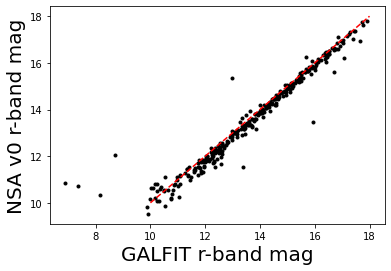

In [29]:
plt.figure()
nsamag = 22.5 - 2.5*np.log10(v.nsav0['NMGY'][:,4])
plt.plot(v.halpha['GAL_MAG'][detect_flag],nsamag[detect_flag],'k.')
#plt.axis([9,23,9,23])
plt.xlabel('GALFIT r-band mag',fontsize=20)
plt.ylabel('NSA v0 r-band mag',fontsize=20)
xl = np.linspace(10,18,100)
plt.plot(xl,xl,'r--')

# Size comparisons

Text(0, 0.5, 'Halpha R24')

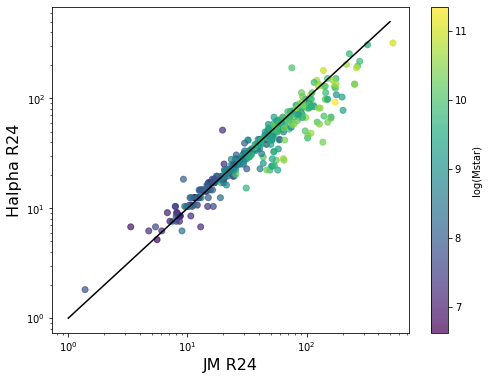

In [245]:
# my R24 vs JM's legacy 
plt.figure(figsize=(8,6))
x = v.ephot['SMA_SB24']
y = v.ha['R24']
plt.scatter(x[haflag],y[haflag],c=v.magphys['logMstar'][haflag],alpha=.7)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
xline = np.linspace(1,500,500)
plt.plot(xline,xline,'k-')
plt.colorbar(label='log(Mstar)')
plt.xlabel("JM R24",fontsize=16)
plt.ylabel("Halpha R24",fontsize=16)

# Positions of Halpha Sources

In [46]:
def plot_spines():
    sfiles = glob.glob(homedir+'/research/Virgo/tables-north/spines/filament*.fits')
    ncolor = 0
    for i,f in enumerate(sfiles):
        spine  = Table.read(f)
        plt.plot(spine['ra'],spine['dec'],c=mycolors[ncolor],label=os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament',''),lw=3)
        ncolor += 1
        if ncolor > len(mycolors)-1:
            ncolor = 0

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


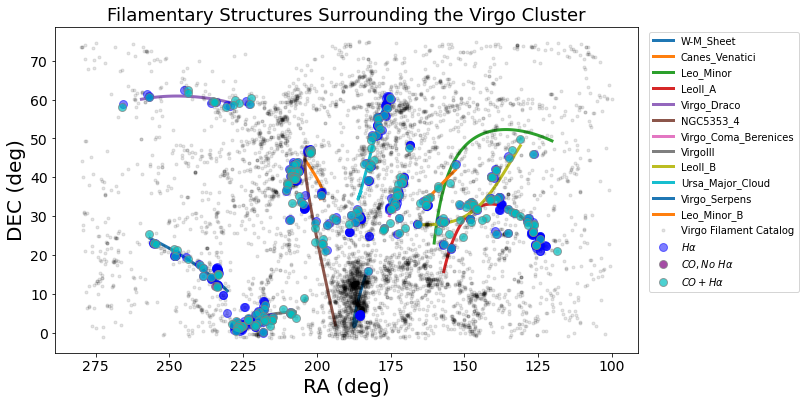

In [162]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(right=.8)
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='Virgo Filament Catalog')
# plot CO sources
flag = v.main['HAobsflag'] & ~v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',alpha=.5,label=r'$H\alpha$',markersize=8)

flag = v.main['COflag'] & ~v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',color='purple',markersize=8,alpha=.7,label=r'$CO, No \ H\alpha$',mec='0.5')
flag = v.main['COflag'] & v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=8,alpha=.7,label=r'$CO + H\alpha$',mec='0.5')

plt.legend(bbox_to_anchor=(1.01,1))
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)
plt.savefig(plotdir+'/halpha_positions.png')
plt.savefig(plotdir+'/halpha_positions.pdf')

# Calculate the Fraction of Galaxies Observed in Each Filament

In [186]:
np.sum(v.paper1['COflag'])

242

In [163]:
# something is not right here - need to update
all_filaments = set(v.env['filament'])
#for f in virgoCommon.filaments: #these need to be renamed
for f in all_filaments:
    filmemb = (v.env['filament'] == f) & (v.env['filament_member'])
    nmemb = sum(filmemb)
    
    filmembco = filmemb & v.paper1['COflag']
    filmembcoha = filmembco & v.main['HAobsflag']
    nco = sum(filmembco)
    ncoha = sum(filmembcoha)
    frac_co_with_ha = ncoha/nco
    
    filmembha = filmemb & v.main['HAobsflag']
    nha = sum(filmembha)
    frac_filmemb_with_ha = nha/nmemb
    
    
    print('######### {}  ##########'.format(f))
    print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
    print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
    print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
    print("")
    

    

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


######### Canes_Venatici  ##########
Number of members=96, CO=0, Halpha=8
Percent of members with Halpha = 8.3 (8/96)
Percent of CO members with Halpha = nan (0/0)

######### NGC5353_4  ##########
Number of members=133, CO=18, Halpha=40
Percent of members with Halpha = 30.1 (40/133)
Percent of CO members with Halpha = 100.0 (18/18)

######### Leo_Minor_B  ##########
Number of members=39, CO=11, Halpha=17
Percent of members with Halpha = 43.6 (17/39)
Percent of CO members with Halpha = 100.0 (11/11)

######### VirgoIII  ##########
Number of members=206, CO=36, Halpha=123
Percent of members with Halpha = 59.7 (123/206)
Percent of CO members with Halpha = 100.0 (36/36)

######### Draco  ##########
Number of members=48, CO=9, Halpha=16
Percent of members with Halpha = 33.3 (16/48)
Percent of CO members with Halpha = 100.0 (9/9)

######### LeoII_A  ##########
Number of members=145, CO=16, Halpha=46
Percent of members with Halpha = 31.7 (46/145)
Percent of CO members with Halpha = 100.0 (16/

In [211]:
filmemb = (~v.env['filament_member'])
nmemb = sum(filmemb)
    
filmembco = filmemb & v.paper1['COflag']
filmembcoha = filmembco & v.main['HAobsflag']
nco = sum(filmembco)
ncoha = sum(filmembcoha)
frac_co_with_ha = ncoha/nco
    
filmembha = filmemb & v.main['HAobsflag']
nha = sum(filmembha)
frac_filmemb_with_ha = nha/nmemb
    
    
print('######### NON FILAMENT GALAXIES  ##########'.format(f))
print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
print("")

######### NON FILAMENT GALAXIES  ##########
Number of members=4662, CO=93, Halpha=264
Percent of members with Halpha = 5.7 (264/4662)
Percent of CO members with Halpha = 100.0 (93/93)



In [97]:
print("number of galaxies observed w/Halpha = ",sum( v.main['HAobsflag']))
print("number of CO and halpha = ",sum(v.main['COflag'] & v.main['HAobsflag']))
print("number of filament members w/CO + Halpha = ",sum(v.main['COflag'] & v.env['filament_member'] & v.main['HAobsflag']))
print("number of non filament members w/CO + Halpha = ",sum(v.main['COflag'] & ~v.env['filament_member'] & v.main['HAobsflag']))
print("number of filament members w/Halpha = ",sum(v.env['filament_member'] & v.main['HAobsflag']))

number of galaxies observed w/Halpha =  689
number of CO and halpha =  241
number of filament members w/CO + Halpha =  148
number of non filament members w/CO + Halpha =  93
number of filament members w/Halpha =  425


# Halpha Targets in z0MGS

In [92]:
print(sum(v.main['HAobsflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] &v.main['COflag'] ))
print(sum(v.main['HAobsflag']  &v.main['COflag'] ))

689
347
235
241


# QC on GALFIT parameters

* compare galfit parameters with NSA Sersic fits
* results look pretty good

In [84]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


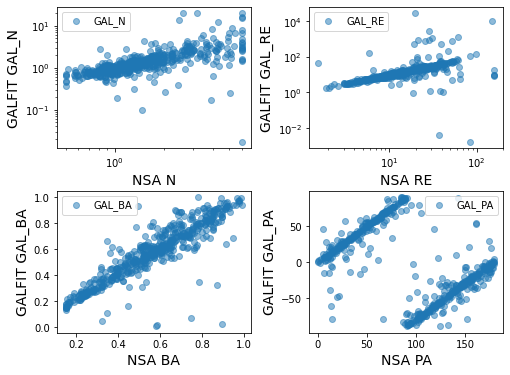

In [85]:
h.plot_qc_galfit()

# Morphologies

* Quality checks with R-band
  * compare Gini, M20, C30, Asymmetry

* Once that is ok, what can we learn from Halpha values?

In [169]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


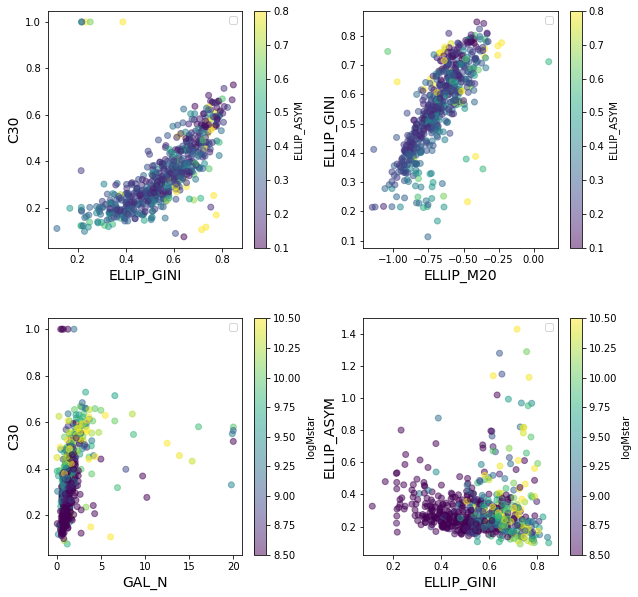

In [170]:
h.plot_qc_qmorph()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


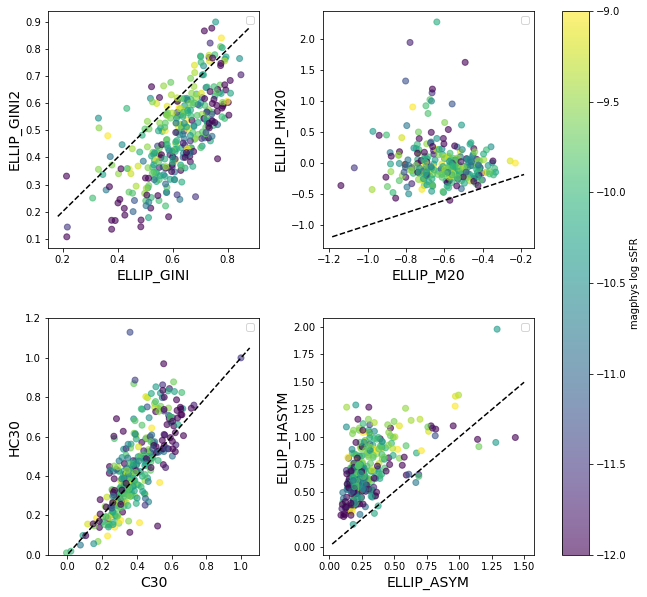

In [177]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_qc_qmorph_ha_r()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/github/havirgo/python/ha-paper1.py:215: RuntimeWarning: invalid value encountered in log10
  


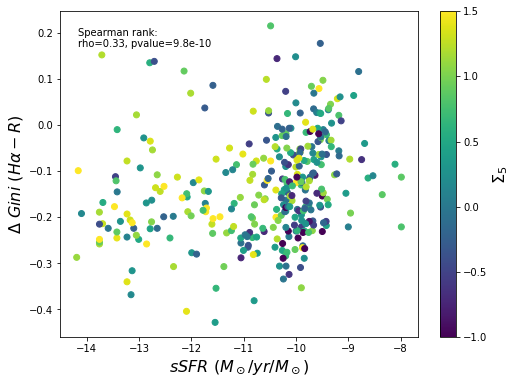

In [182]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_gini_ssfr()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/github/havirgo/python/ha-paper1.py:232: RuntimeWarning: invalid value encountered in log10
  cb.set_label(label="$sSFR$",size=16)


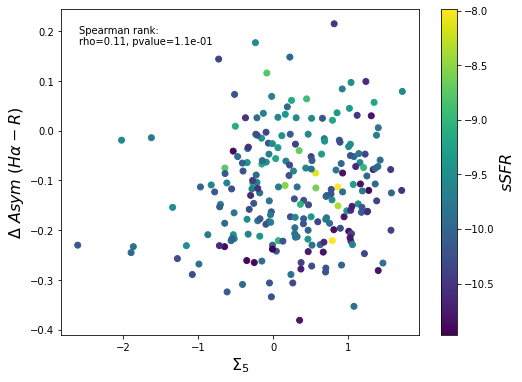

In [174]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_sigma5()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


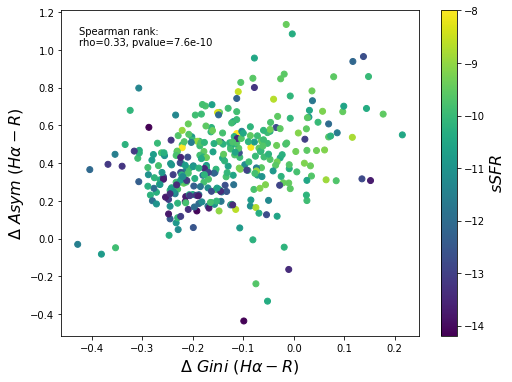

In [179]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_gini()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


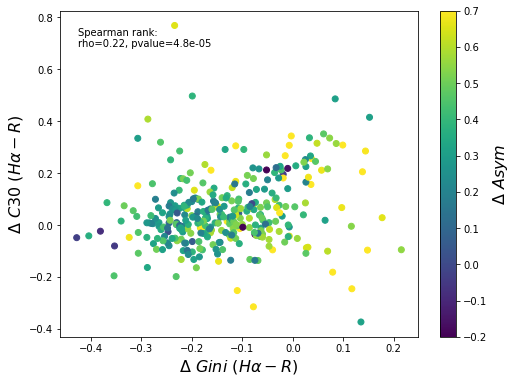

In [184]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_c30_gini()

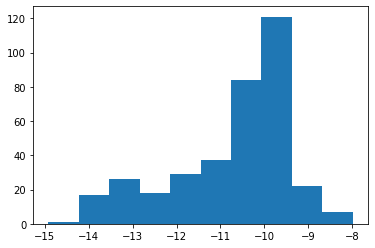

In [159]:
plt.figure()
t = plt.hist(h.magphys['logsSFR'][h.sampleflag])

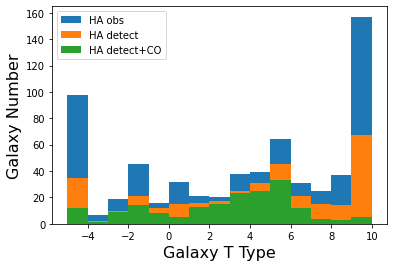

In [35]:
# sample statistics for T type
plt.figure()

x = v.hl['t']

# plot histogram of T type, with and without z0mgs
mybins = np.arange(-5,11)
flag1 = v.haobs['HaObsFlag'] #& ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA obs')
flag1 = v.haobs['HaObsFlag']  & (v.halpha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect')
flag1 = v.haobs['HaObsFlag'] & v.main['COflag'] & haflag
t = plt.hist(x[flag1],bins=mybins,label='HA detect+CO')
plt.xlabel('Galaxy T Type',fontsize=16)
plt.ylabel('Galaxy Number',fontsize=16)
plt.legend()

# Environment

* establish environmental classifications
* delta asym vs environment
* delta gini vs environment
* 

# Sizes

# Compare SFR z0MGS with our SFR

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ks" (-> marker='s'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


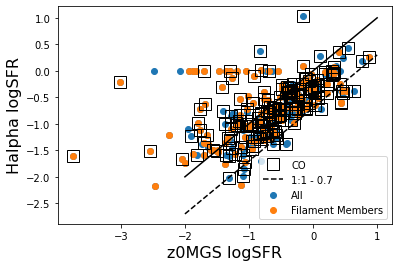

In [155]:
flag = (v.halpha['HF_R24'] > 0) & (v.z0mgs['logmass'] > 0) & haflag
x = v.z0mgs['logsfr']
y = v.halpha['LOG_SFR_HA']
#flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-2,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.7,'k--',label='1:1 - 0.7')
plt.xlabel('z0MGS logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()


In [98]:
flag = (v.halpha['HF_R24'] > 0) & haflag
x = v.magphys['logSFR']
y = v.halpha['LOG_SFR_HA']
#flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-3,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.3,'k--',label='1:1 - 0.3')
plt.xlabel('magphys logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()
plt.axis([-5,1,-4,1])

NameError: name 'haflag' is not defined

In [32]:
def get_BV_MS(logMstar):
    ''' get MS fit that BV calculated from GSWLC '''
    return 0.53*logMstar-5.5

def plot_BV_MS(ax,color='mediumblue',ls='-'):
    plt.sca(ax)
    
    x1,x2 = 8.,11.15
    xline = np.linspace(x1,x2,100)
    yline = get_BV_MS(xline)
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c=color,ls=ls,lw=3,label='Linear Fit GSWLC')

    # scatter around MS fit
    sigma=0.3
    ax.plot(xline,yline-1.5*sigma,c='w',ls='--',lw=4)
    ax.plot(xline,yline-1.5*sigma,c=color,ls='--',lw=3,label='fit-1.5$\sigma$')

def plot_GSWLC_sssfr(ax=None,ls='-'):
    if ax is None:
        ax = plt.gca()

    ssfr = -11.5
    x1,x2 = 9.6,11.15
    xline = np.linspace(x1,x2,100)
    yline = ssfr+xline
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c='0.5',ls=ls,lw=3,label='log(sSFR)=-11.5')
    

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


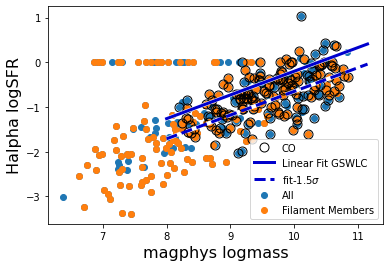

In [33]:
# SF MS
x = v.magphys['logMstar']
y = v.halpha['LOG_SFR_HA']
flag = v.halpha['HAobsflag'] & haflag #(v.ha['GAL_HF_TOT'] > 0)
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ko',marker='o',mfc='None',markersize=9,label='CO')
#xline = np.linspace(8,11,100)
#plt.plot(xline,xline,'k-')
#plt.plot(xline,xline-.5,'k--',label='1:1 - 0.5')
plt.xlabel('magphys logmass',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plot_BV_MS(plt.gca())
plt.legend()




# SFR vs Stellar Mass for all Galaxies vs Halpha Sample



/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


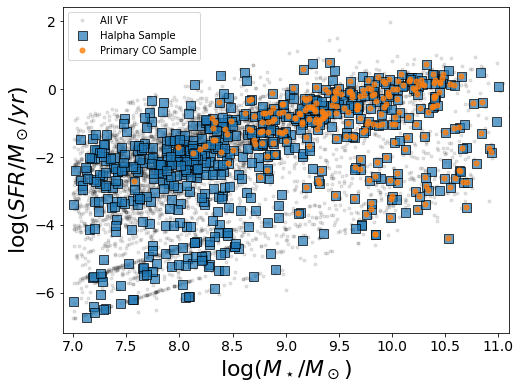

In [36]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.main['HAobsflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.main['HAobsflag']
flag3 = flag1 & v.main['COflag']
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag2],y[flag2],'bs',c=mycolors[0],mec='k',alpha=.7,label='Halpha Sample',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)
plt.savefig(plotdir+'sfr-mstar-halpha.png')
plt.savefig(plotdir+'sfr-mstar-halpha.pdf')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bv" (-> color='b'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()


(6.9, 11.1)

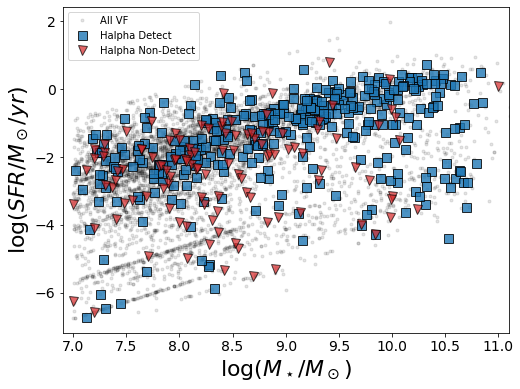

In [37]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.halpha['HAflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.halpha['HAflag'] & ~haflag
flag3 = flag1 & v.main['COflag']
flag4 = flag1 & haflag
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag4],y[flag4],'bs',c=mycolors[0],mec='k',alpha=.8,label='Halpha Detect',markersize=9)
plt.plot(x[flag2],y[flag2],'bv',c=mycolors[3],mec='k',alpha=.7,label='Halpha Non-Detect',markersize=9)
#plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)

plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bv" (-> color='b'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  if sys.path[0] 

(6.9, 11.1)

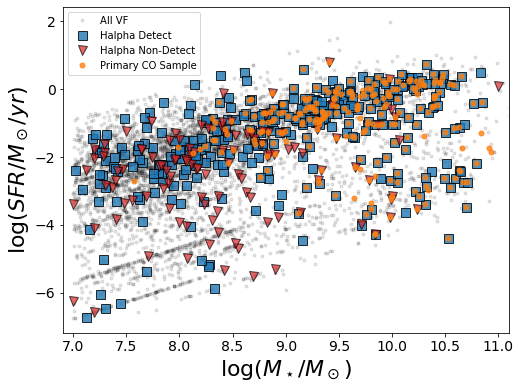

In [38]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.halpha['HAflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.halpha['HAflag'] & ~haflag
flag3 = flag1 & v.paper1['COflag']
flag4 = flag1 & haflag
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag4],y[flag4],'bs',c=mycolors[0],mec='k',alpha=.8,label='Halpha Detect',markersize=9)
plt.plot(x[flag2],y[flag2],'bv',c=mycolors[3],mec='k',alpha=.7,label='Halpha Non-Detect',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)

plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)


# Size of SF Disk vs Stellar Disk

* First some QC to check on our size measurements
* there are a number of r-band size measurements in the halpha catalog
We have

Text(0, 0.5, 'Halpha radius')

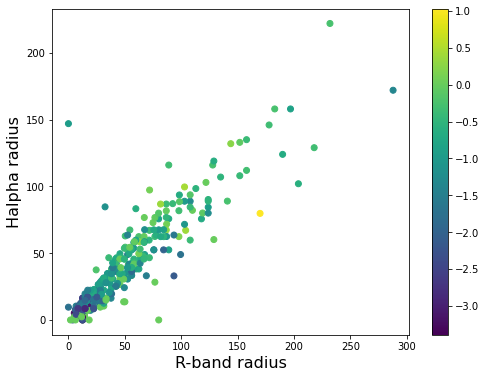

In [67]:
plt.figure(figsize=(8,6))
radr='GAL_PETRO_R90'
radh = 'GAL_HPETRO_R90'

radr='R24'
radh = 'HR17'
x = v.halpha[radr]

y = v.halpha[radh]
c = v.env['n5th_2D']
c = v.halpha['LOG_SFR_HA']
plt.scatter(x[haflag],y[haflag],c=c[haflag])#,vmin=0,vmax=10)
plt.colorbar()
plt.xlabel('R-band radius',fontsize=16)
plt.ylabel('Halpha radius',fontsize=16)

In [188]:
import seaborn as sns

In [190]:
import pandas

In [209]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value enco

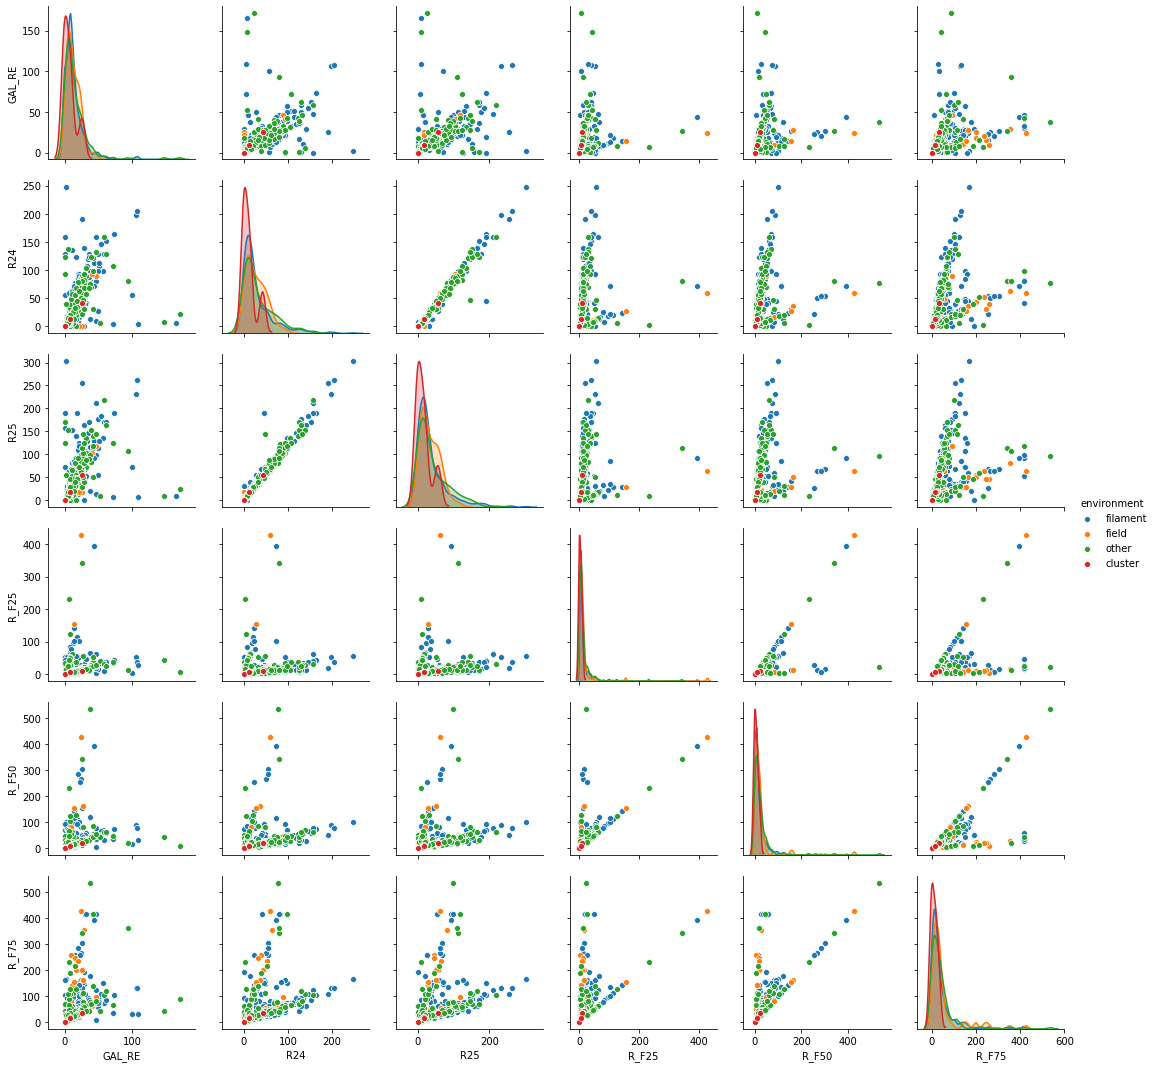

In [233]:
#tab = Table(h.halpha['HR16','HR17','HR_F25','HR_F50','HR_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

tab = Table(h.halpha['GAL_RE','R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
flag = h.main['HAobsflag'] & (h.halpha['GAL_RE'] < 200)
sns.pairplot(df[flag],hue="environment")

/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rfinn/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value enco

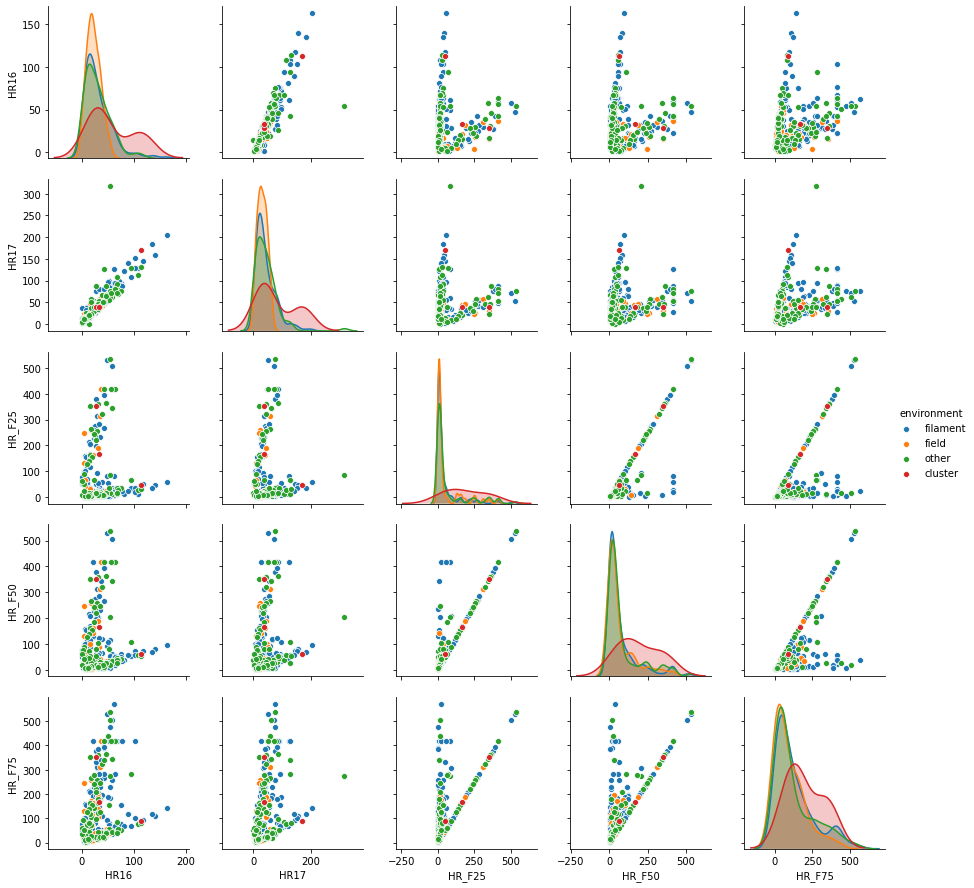

In [227]:
tab = Table(h.halpha['HR16','HR17','HR_F25','HR_F50','HR_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

#tab = Table(h.halpha['R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
sns.pairplot(df[h.sampleflag],hue="environment")

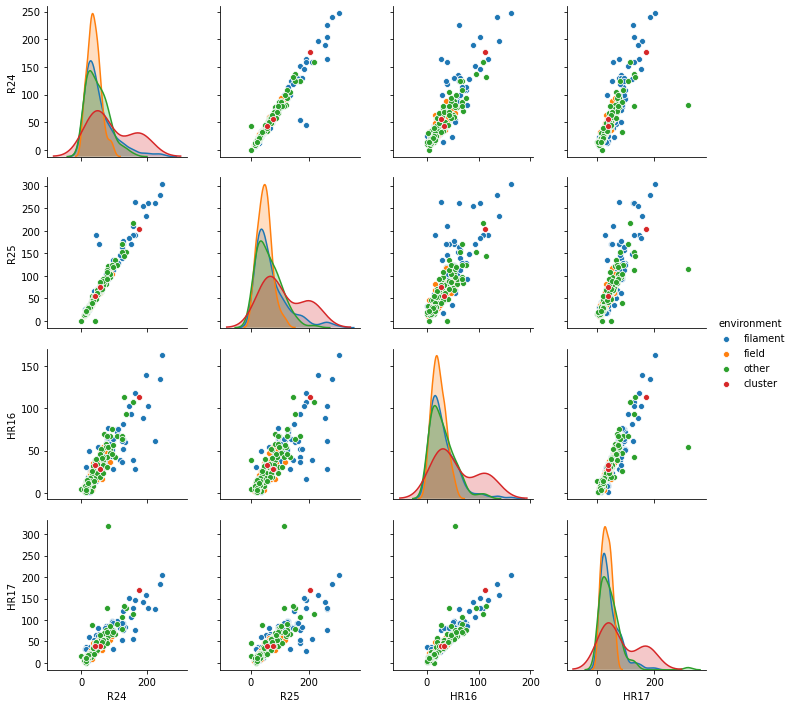

In [242]:
tab = Table(h.halpha['R24','R25','HR16','HR17'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

#tab = Table(h.halpha['R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
sns.pairplot(df[h.sampleflag],hue="environment")#, diag_kind="hist")

In [222]:
enames = set(h.environment)
ntot = 0
for e in enames:
    print(e,np.sum(np.array(h.environment)[h.sampleflag] == e))
    ntot += np.sum(np.array(h.environment)[h.sampleflag] == e)
print("ntot = ",ntot)

other 92
filament 187
cluster 3
field 48
ntot =  330


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


Text(0.5, 0, 'Size Ratio')

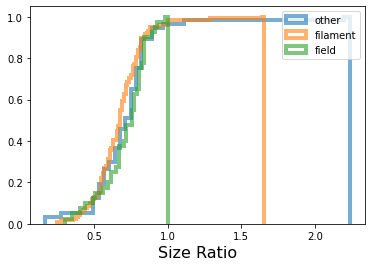

In [275]:
sizeratio = h.halpha['HR17']/h.halpha['R25']
flag1 = h.sampleflag & (h.halpha['R25'] > 0) & (h.hl['t'] > 1)
sizeratio = sizeratio[flag1]

envcat = np.array(h.environment)[flag1]
plt.figure()

for e in enames:
    if e == 'cluster':
        continue
    flag =  (np.array(envcat) == e) 
    plt.hist((sizeratio[flag]),cumulative=True,density=True,label=e,alpha=.6,histtype='step',lw=4,bins=np.sum(flag))
plt.legend()
plt.xlabel('Size Ratio',fontsize=16)

In [257]:
from scipy.stats import ks_2samp

In [273]:
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'filament']))
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'other']))
print(ks_2samp(sizeratio[envcat == 'filament'],sizeratio[envcat == 'other']))

Ks_2sampResult(statistic=0.26101694915254237, pvalue=0.02702582245282592)
Ks_2sampResult(statistic=0.10219298245614035, pvalue=0.9371106311738089)
Ks_2sampResult(statistic=0.2303003270889087, pvalue=0.027565848934718917)


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


Ks_2sampResult(statistic=0.25811965811965815, pvalue=0.030265717146375937)
Ks_2sampResult(statistic=0.10219298245614035, pvalue=0.9371106311738089)
Ks_2sampResult(statistic=0.2276203328834908, pvalue=0.030678483429637304)


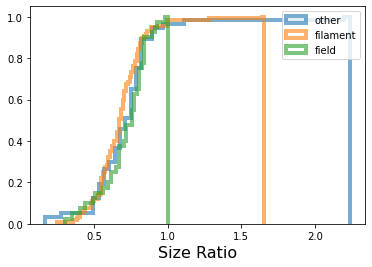

In [283]:
sizeratio = h.halpha['HR17']/h.halpha['R25']
flag1 = h.sampleflag & (h.halpha['R26'] > 0) & (h.hl['t'] > 1)
sizeratio = sizeratio[flag1]

envcat = np.array(h.environment)[flag1]
plt.figure()

for e in enames:
    if e == 'cluster':
        continue
    flag =  (np.array(envcat) == e) 
    plt.hist((sizeratio[flag]),cumulative=True,density=True,label=e,alpha=.6,histtype='step',lw=4,bins=np.sum(flag))
plt.legend()
plt.xlabel('Size Ratio',fontsize=16)

print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'filament']))
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'other']))
print(ks_2samp(sizeratio[envcat == 'filament'],sizeratio[envcat == 'other']))

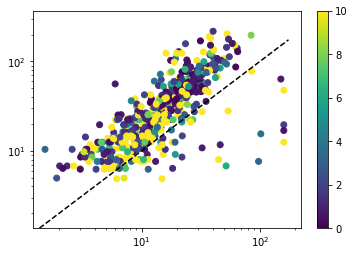

In [41]:
plt.figure()
flag = v.main['HAobsflag']
x = v.nsav0['SERSIC_TH50']
rad = 'GAL_RE'
y = v.halpha[rad]*.4
y = v.halpha['R24']
c = v.env['n5th_2D']
plt.scatter(x[flag],y[flag],c=c[flag],vmin=0,vmax=10)
plt.colorbar()
#plt.axis([0,175,0,175])
xline = np.linspace(0,175,100)
plt.plot(xline,xline,'k--')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

In [43]:
nohaflag = v.paper1['COflag']  & ~v.haobs['HaObsFlag']
print('number of CO sources w/out halpha = ',np.sum(nohaflag))

cohaflag = v.paper1['COflag']  & v.haobs['HaObsFlag']
print('number of CO sources w/halpha = ',np.sum(cohaflag))

number of CO sources w/out halpha =  0
number of CO sources w/halpha =  242


In [88]:
# after rogue INT images have been incorporated
plt.figure(figsize=(12,6))

plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)

plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
#plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plot_spines()
plt.legend(bbox_to_anchor=(1.01,.8))
plt.savefig(os.path.join(plotdir,'halpha-positions.png'))

NameError: name 'v' is not defined

<Figure size 864x432 with 0 Axes>

In [50]:
mosaic_centers = [(217.47004045301, 3.4214593967644 ),
(222.72913181465, 2.7345640175569 ),
(223.13184736148, 3.6234238130428 ),
(225.20704416283, 1.9044058457402 ),
(225.73783713095, 0.8310807818246 ),
(226.67637236951, 1.7576779842495 ),
(227.79885197738, 1.7050183823229) ]
morderbyra = [7,6,5,2,4,1,3]
mosaic_names = [f"NGC5846-0{i}" for i in morderbyra]
mosaic_names

['NGC5846-07',
 'NGC5846-06',
 'NGC5846-05',
 'NGC5846-02',
 'NGC5846-04',
 'NGC5846-01',
 'NGC5846-03']

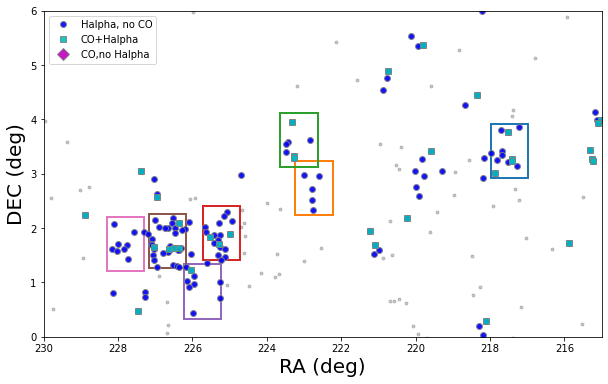

In [51]:
plt.figure(figsize=(10,6))

plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)
plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)


for i,m in enumerate(mosaic_names):
    # add a rectangle for Blanco DD time, spring 2021
    rect = Rectangle((mosaic_centers[i][0]-0.5,mosaic_centers[i][1]-0.5), 1, 1, fc="none",ec=mycolors[i],lw=2,label=m)
    plt.gca().add_artist(rect)
  
plt.axis([215,230,0,6])
plt.gca().invert_xaxis()
plt.legend()



In [28]:
mycolors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  app.launch_new_instance()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.



number with halpha = 658


number with CO = 242



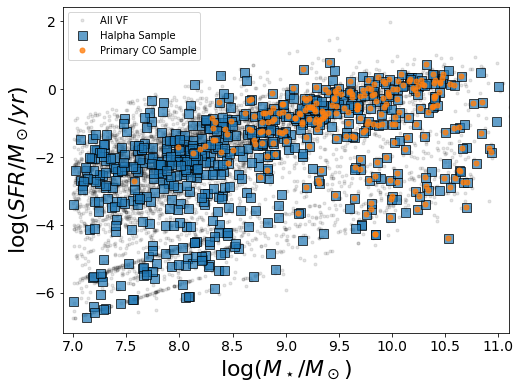

In [55]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.haobs['HaObsFlag'] & ~v.paper1['COflag']# valid magphys fit
flag2 = flag1 & v.haobs['HaObsFlag']
print()
print(f"number with halpha = {np.sum(flag2)}")
print()
flag3 = flag1 & v.main['COflag']

print()
print(f"number with CO = {np.sum(flag3)}")
print()
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag2],y[flag2],'bs',c=mycolors[0],mec='k',alpha=.7,label='Halpha Sample',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)
plt.savefig(plotdir+'sfr-mstar-halpha.png')
plt.savefig(plotdir+'sfr-mstar-halpha.pdf')

350


Text(0, 0.5, 'log SFR Halpha ')

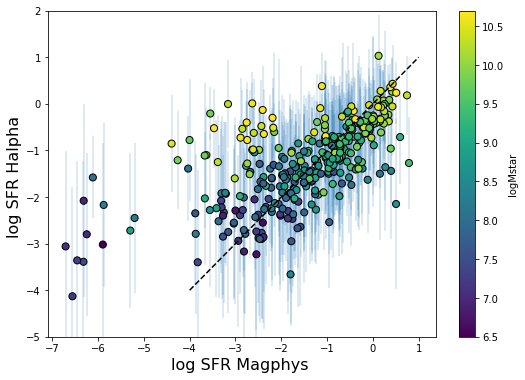

In [65]:
# magphys SFR vs halpha sfr
flag = v.halpha['LOG_SFR_HA_FLAG']
flag = v.halpha['LOG_SFR_HA'] != 0
print(np.sum(flag))
x = v.magphys['logSFR']
y = v.halpha['LOG_SFR_HA']
yerr = v.halpha['LOG_SFR_HA_ERR']
plt.figure(figsize=(8,6))
plt.errorbar(x[flag],y[flag],0.5*yerr[flag],fmt='None',alpha=.2)
plt.scatter(x[flag],y[flag],s=50,c=v.magphys['logMstar'][flag],vmax=10.7,vmin=6.5,zorder=2,edgecolors='k')
cb = plt.colorbar(fraction=.08,label='logMstar')
xline = np.linspace(-4,1,100)
plt.plot(xline,xline,'k--')
plt.ylim(-5,2)
plt.xlabel("log SFR Magphys ",fontsize=16)
plt.ylabel("log SFR Halpha ",fontsize=16)

Text(0, 0.5, 'logSFR Halpha Error')

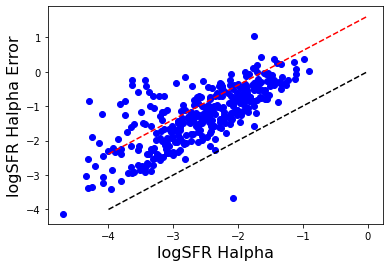

In [59]:
plt.figure()
plt.plot(yerr[flag],y[flag],'bo')
xline = np.linspace(-4,0,100)
plt.plot(xline,xline,'k--',label="1:1")
plt.plot(xline,xline+np.log(5),'r--',label="1:0.5")
plt.xlabel('logSFR Halpha',fontsize=16)
plt.ylabel('logSFR Halpha Error',fontsize=16)

# Image PSF Statistics

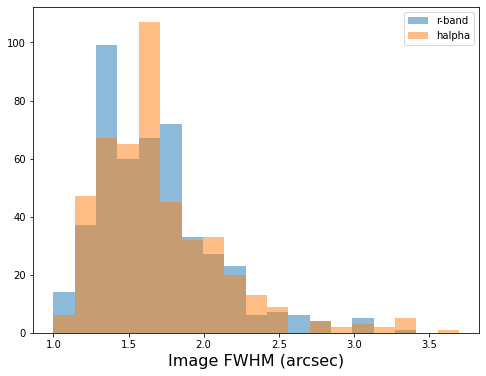

In [60]:
plt.figure(figsize=(8,6))
flag = v.halpha['HAflag']
mybins = np.linspace(1,3.7,20)
plt.hist(v.halpha['R_FWHM'][flag],alpha=.5,label='r-band',bins=mybins)
plt.hist(v.halpha['H_FWHM'][flag],alpha=.5,label='halpha',bins=mybins)
plt.xlabel('Image FWHM (arcsec)',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()

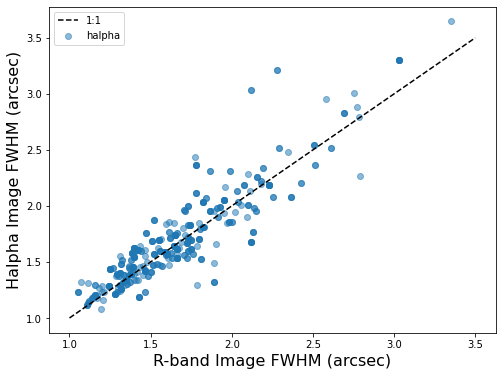

In [63]:
plt.figure(figsize=(8,6))
flag = v.halpha['HAflag']
mybins = np.linspace(1,3.7,20)
plt.scatter(v.halpha['R_FWHM'][flag],v.halpha['H_FWHM'][flag],alpha=.5,label='halpha')
plt.xlabel('R-band Image FWHM (arcsec)',fontsize=16)
plt.ylabel('Halpha Image FWHM (arcsec)',fontsize=16)
xline = np.linspace(1,3.5,100)
plt.plot(xline,xline,'k--',label='1:1')
plt.legend()

# Sizes and  morphology

* Gini vs M20
* C30 Halpha vs C

Text(0, 0.5, 'Gini')

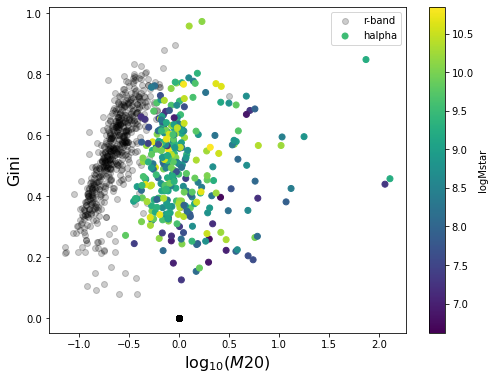

In [161]:
plt.figure(figsize=(8,6))
detect_flag = v.halpha['HF_TOT'] > 0
y = v.halpha['ELLIP_GINI']
x = v.halpha['ELLIP_M20']
plt.scatter(x,y,label='r-band',c='k',alpha=.2)


y = v.halpha['ELLIP_GINI2']
x = v.halpha['ELLIP_HM20']
color = np.log10(v.halpha['ELLIP_AREA'][detect_flag])
color = v.magphys['logMstar'][detect_flag]
color_labels = ['log10(area)','log(Mstar)']
plt.scatter(x[detect_flag],y[detect_flag],c=color,label='halpha')
plt.colorbar(label=color_labels[1])
plt.legend()
plt.xlabel("$\log_{10}(M20)$",fontsize=16)
plt.ylabel("Gini",fontsize=16)

Text(0.5, 0, 'C30')

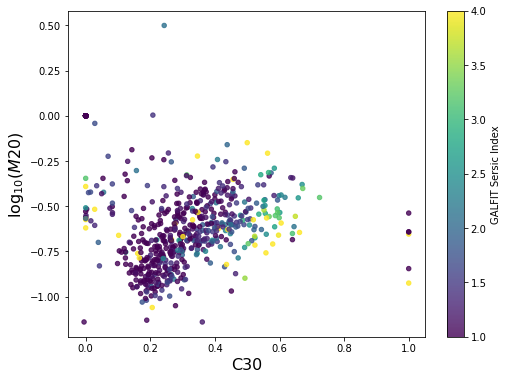

In [102]:
# Rband M20 vs C30

plt.figure(figsize=(8,6))
detect_flag = v.halpha['HAobsflag']
x = v.halpha['C30']
y = v.halpha['ELLIP_M20']
c = v.halpha['GAL_N']
plt.scatter(x[detect_flag],y[detect_flag],label='r-band',s=20,c=c[detect_flag],alpha=.8,vmin=1,vmax=4)
plt.colorbar(label='GALFIT Sersic Index')
plt.ylabel("$\log_{10}(M20)$",fontsize=16)
plt.xlabel("C30",fontsize=16)